In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy import stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_excel('CA_Offenses_by_city_2013.xls', skip_rows=[0, 1, 2, 3], header=4, nrows=462)

In [3]:
df.rename(columns={df.columns[10]: "Larceny"}, inplace=True)
df.rename(columns={df.columns[11]: "Auto"}, inplace=True)
df.rename(columns={df.columns[8]: "Property crime"}, inplace=True)
df.fillna(0)
df.drop(df.columns[[4]], axis=1, inplace=True)
df['City'] = df['City'].astype(str)

In [4]:
city = pd.get_dummies(df.City)
df.drop(['City'], inplace=True, axis=1)
df_merge = pd.concat([df, city], axis=1)
df_merge.drop(df_merge.columns[3], axis=1, inplace=True)
df_merge['Larceny'] = pd.to_numeric(df_merge['Larceny'])
#df_merge.loc[df_merge.Murder1 > 0, 'Murder1'] = 1
#df_merge.loc[df_merge.Robbery > 0, 'Robbery'] = 1

In [5]:
df['Population**2'] = df['Population']**2

In [22]:
# Instantiate and fit our model.
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Population**2','Larceny', 'Auto']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 4 columns):
Population       462 non-null int64
Population**2    462 non-null int64
Larceny          462 non-null int64
Auto             462 non-null int64
dtypes: int64(4)
memory usage: 14.5 KB

Coefficients: 
 [[ 1.72822974e-03 -1.95093174e-10  1.07713929e+00  1.51947880e+00]]

Intercept: 
 [55.58128267]

R-squared:
0.9980677277384818


In [23]:
from sklearn.cross_decomposition import PLSRegression

R-squared regression: 1.0
R-squared PLSR: 0.9995131602720463


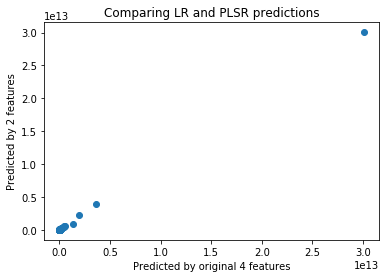

In [28]:
y = X.iloc[:, 0] + 2 * X.iloc[:, 1] + np.random.normal(size=462 * 1) + 5

# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
#plt.xlim(0,1)
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 4 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()